<a href="https://colab.research.google.com/github/bprabin811/ChurnPredictionUI/blob/main/python_fun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CountryInfo**

In [ ]:
!pip install countryinfo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.2/602.2 kB 17.9 MB/s eta 0:00:00


In [ ]:
from countryinfo import CountryInfo

country = CountryInfo('Nepal')

data ={
    'Capital': country.capital(),
    'Currencies': country.currencies(),
    'Languages': country.languages(),
    'Borders': country.borders(),
    'Timezones': country.timezones(),
    'Population': country.population(),
    'Region': country.region(),
    'Subregion': country.subregion(),
    'Area': country.area(),
}

data

{'Capital': 'Kathmandu',
 'Currencies': ['NPR'],
 'Languages': ['ne'],
 'Borders': ['CHN', 'IND'],
 'Timezones': ['UTC+05:45'],
 'Population': 27646053,
 'Region': 'Asia',
 'Subregion': 'Southern Asia',
 'Area': 147181}

In [ ]:
def add(x,y):
  return x+y

def sub(x,y):
  return x-y

def mul(x,y):
  return x*y

def div(x,y):
  return x/y

def pipe(value, *functions):
  for func, arg in functions:
    value = func(value,arg)
    return value

In [ ]:
pipe(5, (add,3))

8

In [ ]:
def devide(a,b):
  assert b != 0, 'b cannot be zero.'
  return a/b

devide(10,5)

2.0

In [1]:
import pandas as pd

In [19]:
df= pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [20]:
df.drop(columns=['date'], inplace=True)
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])
df.head()


,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['precipitation'])
y = df['precipitation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape


(1168, 4)
(293, 4)
(1168,)


(293,)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Gather neighbor distances and statistics
neighbor_distances, _ = knn_regressor.kneighbors(X_test)
avg_neighbor_distances = neighbor_distances.mean(axis=1)
min_neighbor_distance = neighbor_distances.min()
max_neighbor_distance = neighbor_distances.max()
avg_distance = avg_neighbor_distances.mean()



Mean Squared Error: 36.739107167235495
R-squared: 0.053696359775734503


In [11]:
# Prepare data for actual vs. predicted plot
actual_vs_predicted = {
    "actual": y_test.tolist(),
    "predicted": y_pred.tolist(),
    "avg_neighbor_distances": avg_neighbor_distances.tolist()
}

neighbor_stats = {
    "avg_distance": avg_distance,
    "min_distance": min_neighbor_distance,
    "max_distance": max_neighbor_distance
}



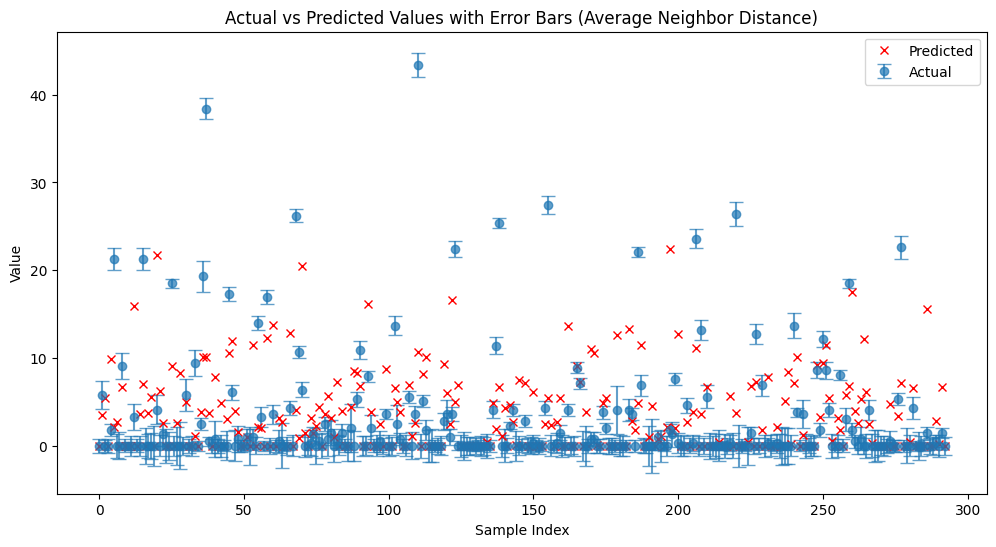

Neighbor Stats: {'avg_distance': 1.1149986858015148, 'min_distance': 0.0, 'max_distance': 3.184336665618131}
Actual vs Predicted: {'actual': [0.0, 5.8, 0.0, 0.0, 1.8, 21.3, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 3.3, 0.0, 0.0, 21.3, 0.0, 0.0, 0.0, 0.0, 4.1, 0.0, 1.3, 0.0, 0.0, 18.5, 0.0, 0.0, 0.0, 0.0, 5.8, 0.0, 0.0, 9.4, 0.0, 2.5, 19.3, 38.4, 0.5, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 17.3, 6.1, 0.0, 0.8, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 14.0, 3.3, 0.0, 17.0, 0.0, 3.6, 0.0, 0.5, 0.0, 0.0, 0.0, 4.3, 0.0, 26.2, 10.7, 6.4, 0.0, 0.0, 0.3, 1.3, 0.0, 0.5, 0.0, 2.5, 0.8, 1.5, 0.0, 0.5, 0.0, 1.5, 0.0, 0.0, 2.0, 0.0, 5.3, 10.9, 0.0, 0.0, 7.9, 2.0, 0.0, 0.0, 0.5, 0.0, 3.6, 0.0, 0.0, 13.7, 2.5, 0.8, 0.0, 0.0, 5.6, 0.0, 3.6, 43.4, 0.0, 5.1, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8, 3.6, 1.0, 3.6, 22.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.1, 11.4, 25.4, 0.0, 0.0, 0.0, 2.3, 4.1, 0.0, 0.0, 0.0, 2.8, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 4.3, 27.4, 0.0, 0.0, 0.3, 1.5, 0.0, 0.0, 4.1, 0.0, 0.0, 8.9, 7.1, 0.0, 0

In [12]:
# Plot actual vs predicted with error bars for neighbor distances
plt.figure(figsize=(12, 6))
plt.errorbar(range(len(y_test)), y_test, yerr=avg_neighbor_distances, fmt='o', label='Actual', alpha=0.7, capsize=5)
plt.plot(range(len(y_test)), y_pred, 'x', label='Predicted', color='red')
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values with Error Bars (Average Neighbor Distance)")
plt.legend()
plt.show()

print("Neighbor Stats:", neighbor_stats)
print("Actual vs Predicted:", actual_vs_predicted)


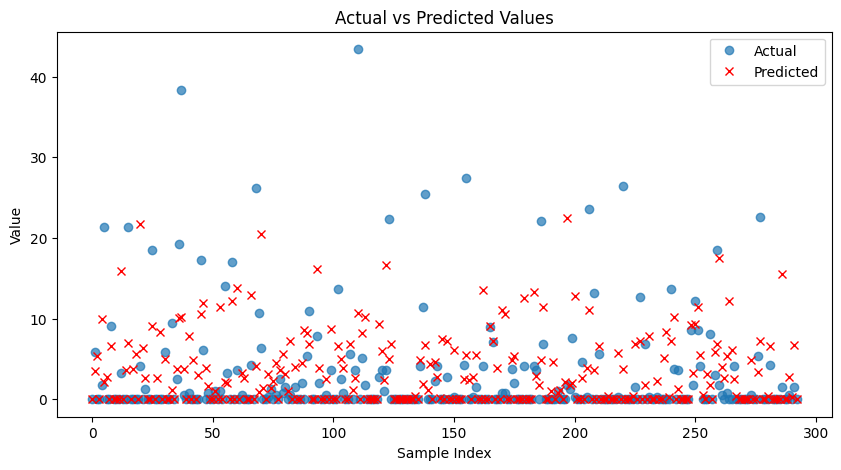

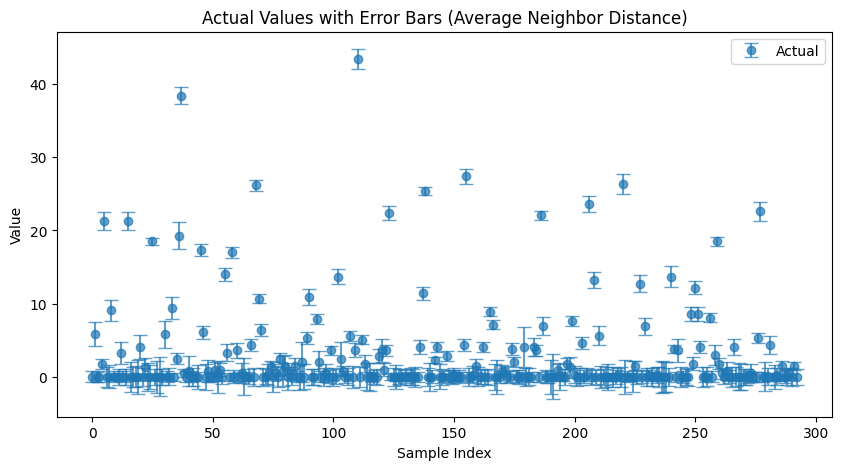

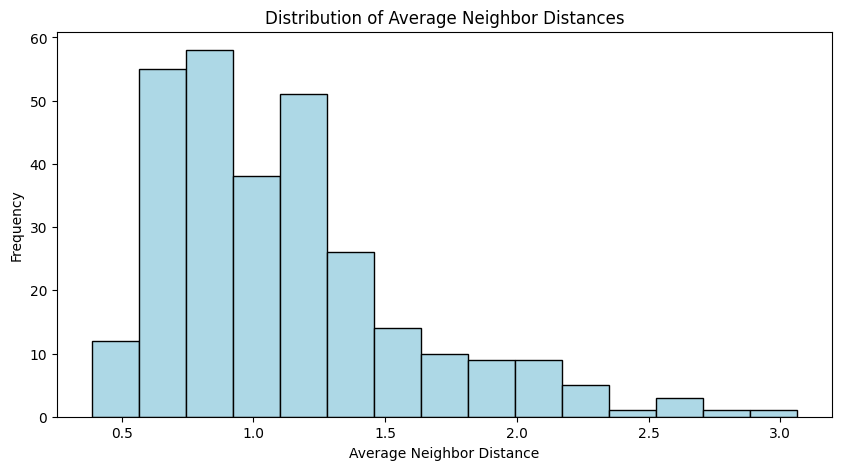

Neighbor Stats: {'avg_distance': 1.1149986858015148, 'min_distance': 0.0, 'max_distance': 3.184336665618131}
Actual vs Predicted: {'actual': [0.0, 5.8, 0.0, 0.0, 1.8, 21.3, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 3.3, 0.0, 0.0, 21.3, 0.0, 0.0, 0.0, 0.0, 4.1, 0.0, 1.3, 0.0, 0.0, 18.5, 0.0, 0.0, 0.0, 0.0, 5.8, 0.0, 0.0, 9.4, 0.0, 2.5, 19.3, 38.4, 0.5, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 17.3, 6.1, 0.0, 0.8, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 14.0, 3.3, 0.0, 17.0, 0.0, 3.6, 0.0, 0.5, 0.0, 0.0, 0.0, 4.3, 0.0, 26.2, 10.7, 6.4, 0.0, 0.0, 0.3, 1.3, 0.0, 0.5, 0.0, 2.5, 0.8, 1.5, 0.0, 0.5, 0.0, 1.5, 0.0, 0.0, 2.0, 0.0, 5.3, 10.9, 0.0, 0.0, 7.9, 2.0, 0.0, 0.0, 0.5, 0.0, 3.6, 0.0, 0.0, 13.7, 2.5, 0.8, 0.0, 0.0, 5.6, 0.0, 3.6, 43.4, 0.0, 5.1, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8, 3.6, 1.0, 3.6, 22.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.1, 11.4, 25.4, 0.0, 0.0, 0.0, 2.3, 4.1, 0.0, 0.0, 0.0, 2.8, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 4.3, 27.4, 0.0, 0.0, 0.3, 1.5, 0.0, 0.0, 4.1, 0.0, 0.0, 8.9, 7.1, 0.0, 0

In [13]:
# Plot 1: Actual vs Predicted Values
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, 'o', label='Actual', alpha=0.7)
plt.plot(range(len(y_test)), y_pred, 'x', label='Predicted', color='red')
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

# Plot 2: Actual Values with Error Bars (Average Neighbor Distance)
plt.figure(figsize=(10, 5))
plt.errorbar(range(len(y_test)), y_test, yerr=avg_neighbor_distances, fmt='o', label='Actual', alpha=0.7, capsize=5)
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual Values with Error Bars (Average Neighbor Distance)")
plt.legend()
plt.show()

# Plot 3: Histogram of Average Neighbor Distances
plt.figure(figsize=(10, 5))
plt.hist(avg_neighbor_distances, bins=15, color='lightblue', edgecolor='black')
plt.xlabel("Average Neighbor Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Average Neighbor Distances")
plt.show()

print("Neighbor Stats:", neighbor_stats)
print("Actual vs Predicted:", actual_vs_predicted)